# 1. Import Necessary Libraries

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [168]:
#converting into dataframe
df = pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [169]:
df.shape

(9134, 26)

In [170]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [152]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


### Imputing Missing Values with Medians

In [30]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [31]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

# 3. Exploratory Data Analysis Data Visualization

In [32]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [35]:
print('Average claim amount is',df['Claim Amount'].median())

Average claim amount is 578.0182197


In [36]:
print('Average of Total claim amount is',df['Total Claim Amount'].median())

Average of Total claim amount is 383.94543350000004


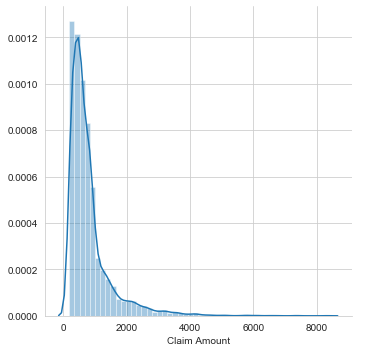

In [13]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Claim Amount')\
    .add_legend();
plt.show()

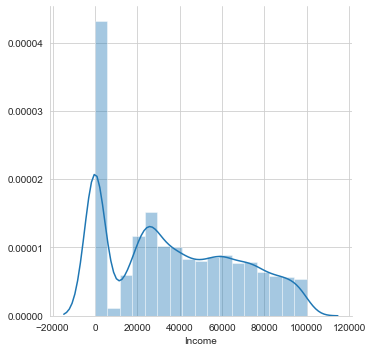

In [14]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Income')\
    .add_legend();
plt.show()

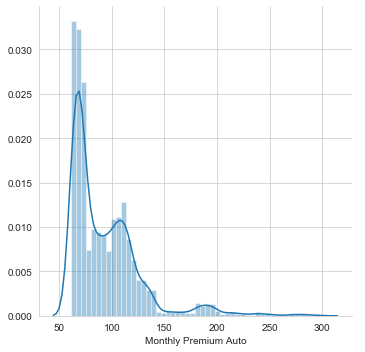

In [16]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Monthly Premium Auto')\
    .add_legend();
plt.show()

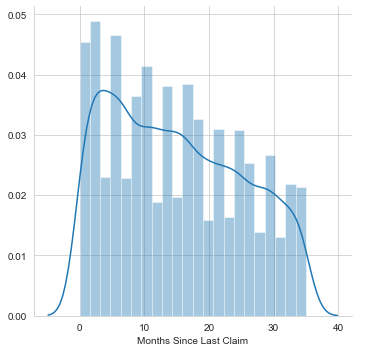

In [17]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Months Since Last Claim')\
    .add_legend();
plt.show()

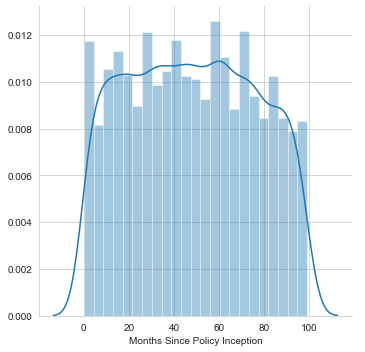

In [18]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Months Since Policy Inception')\
    .add_legend();
plt.show()

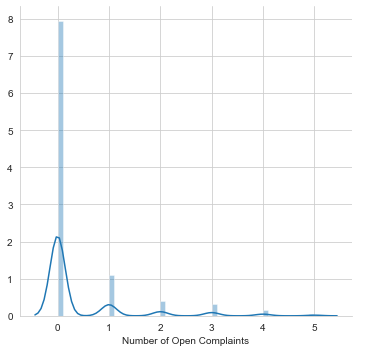

In [19]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Number of Open Complaints')\
    .add_legend();
plt.show()

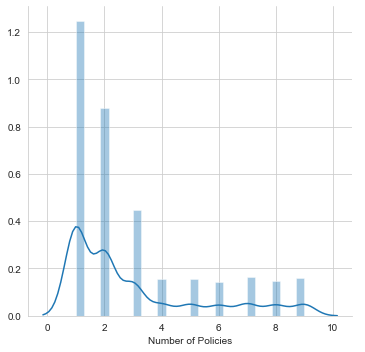

In [20]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Number of Policies')\
    .add_legend();
plt.show()

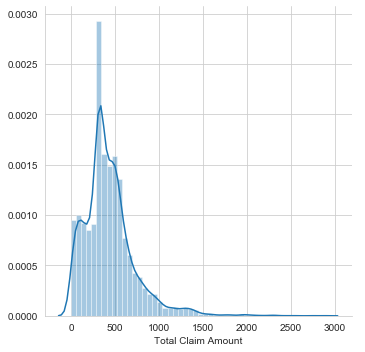

In [21]:
sns.FacetGrid(df,height=5)\
    .map(sns.distplot,'Total Claim Amount')\
    .add_legend();
plt.show()

In [171]:

Income_transformed = np.log(df['Income']+ 1)
df['Income']=Income_transformed

MPA_transformed = np.log(df['Monthly Premium Auto']+ 1)
df['Monthly Premium Auto']=MPA_transformed

MSLC_transformed = np.log(df['Months Since Last Claim']+ 1)
df['Months Since Last Claim']=MSLC_transformed


NOC_transformed = np.log(df['Number of Open Complaints']+ 1)
df['Number of Open Complaints']=NOC_transformed

Policies_transformed = np.log(df['Number of Policies']+ 1)
df['Number of Policies']=Policies_transformed

Amount_transformed = np.log(df['Total Claim Amount']+ 1)
df['Total Claim Amount']=Amount_transformed


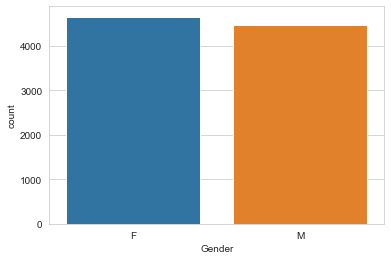

In [64]:
sns.countplot(df.Gender)

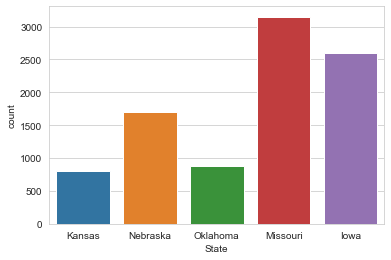

In [67]:
sns.countplot(df.State)

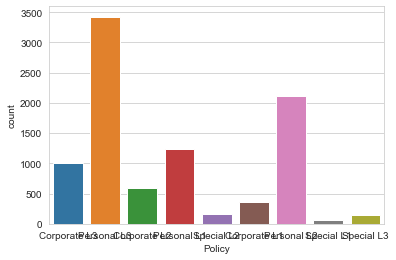

In [71]:
sns.countplot(df.Policy)

# 4.  Data Visualization with PCA

In [84]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Customer']= label_encoder.fit_transform(df['Customer'])  
df['Country']= label_encoder.fit_transform(df['Country']) 
df['State Code']= label_encoder.fit_transform(df['State Code']) 
df['State']= label_encoder.fit_transform(df['State']) 
df['Response']= label_encoder.fit_transform(df['Response']) 
df['Coverage']= label_encoder.fit_transform(df['Coverage']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Effective To Date']= label_encoder.fit_transform(df['Effective To Date']) 
df['EmploymentStatus']= label_encoder.fit_transform(df['EmploymentStatus']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Location Code']= label_encoder.fit_transform(df['Location Code']) 
df['Marital Status']= label_encoder.fit_transform(df['Marital Status']) 
df['Policy Type']= label_encoder.fit_transform(df['Policy Type']) 
df['Policy']= label_encoder.fit_transform(df['Policy']) 
df['Claim Reason']= label_encoder.fit_transform(df['Claim Reason']) 
df['Sales Channel']= label_encoder.fit_transform(df['Sales Channel']) 
df['Vehicle Size']= label_encoder.fit_transform(df['Vehicle Size']) 
df['Vehicle Class']= label_encoder.fit_transform(df['Vehicle Class']) 

In [85]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
features = ['Customer', 'Country', 'State Code', 'State',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

x = df.loc[:, features].values

y = df.loc[:,['Claim Amount']].values

x = StandardScaler().fit_transform(x)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [41]:
finalDf = pd.concat([principalDf, df[['Claim Amount']]], axis = 1)

In [43]:
df['Claim Amount'].unique()

array([ 276.3519279,  697.9535903, 1288.743165 , ...,  816.3890428,
        752.4442436,  261.1836866])

In [47]:
finalDf

,principal component 1,principal component 2,Claim Amount
0,-0.892129,-0.412088,276.351928
1,2.795456,1.265639,697.953590
2,0.614679,2.324181,1288.743165
3,1.581390,0.751329,764.586183
4,-0.972765,-0.820119,281.369258
...,...,...,...
9129,-1.536927,0.251282,2340.598798
9130,-0.622661,0.678534,309.651122
9131,2.455416,0.841290,816.389043
9132,0.294123,0.307621,752.444244


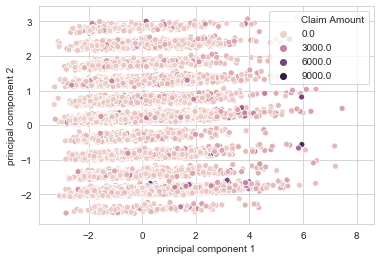

In [57]:
ax = sns.scatterplot(x="principal component 1", y="principal component 2",hue="Claim Amount" ,data=finalDf)

# 4. Data pre-processing and cleaning

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [58]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## A.Converting all features to numerical features 

In [110]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [172]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Customer']= label_encoder.fit_transform(df['Customer'])  
df['Country']= label_encoder.fit_transform(df['Country']) 
df['State Code']= label_encoder.fit_transform(df['State Code']) 
df['State']= label_encoder.fit_transform(df['State']) 
df['Response']= label_encoder.fit_transform(df['Response']) 
df['Coverage']= label_encoder.fit_transform(df['Coverage']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Effective To Date']= label_encoder.fit_transform(df['Effective To Date']) 
df['EmploymentStatus']= label_encoder.fit_transform(df['EmploymentStatus']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Location Code']= label_encoder.fit_transform(df['Location Code']) 
df['Marital Status']= label_encoder.fit_transform(df['Marital Status']) 
df['Policy Type']= label_encoder.fit_transform(df['Policy Type']) 
df['Policy']= label_encoder.fit_transform(df['Policy']) 
df['Claim Reason']= label_encoder.fit_transform(df['Claim Reason']) 
df['Sales Channel']= label_encoder.fit_transform(df['Sales Channel']) 
df['Vehicle Size']= label_encoder.fit_transform(df['Vehicle Size']) 
df['Vehicle Class']= label_encoder.fit_transform(df['Vehicle Class']) 

In [125]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,276.351928,0,0,0,47,1,...,1.791759,0.0,0.693147,0,2,0,0,5.955348,5,1
1,5946,0,3,3,697.953590,0,1,0,24,4,...,3.761200,0.0,2.197225,1,5,3,0,7.032152,0,1
2,96,0,4,4,1288.743165,0,2,0,41,1,...,3.663562,0.0,1.098612,1,5,0,0,6.341192,5,1
3,8016,0,2,2,764.586183,0,0,0,12,4,...,4.189655,0.0,2.079442,0,1,0,2,6.274539,3,1
4,2488,0,1,1,281.369258,0,0,0,52,1,...,3.806662,0.0,0.693147,1,3,0,0,4.935415,0,1


## B.Removing outliers using standard methods

In [173]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df.drop(['Claim Amount'],axis=1)))
print(np.where(z>3))
df1=df.drop(['Claim Amount'],axis=1)[(z<3).all(axis=1)]

(array([  31,   34,   41,   45,   71,   86,   92,  129,  153,  185,  196,
        243,  244,  248,  259,  274,  281,  292,  316,  327,  337,  368,
        386,  403,  404,  406,  425,  444,  496,  510,  554,  600,  601,
        633,  634,  645,  664,  676,  680,  684,  702,  703,  716,  727,
        749,  755,  790,  814,  832,  863,  869,  872,  873,  888,  899,
        926,  949,  982,  987, 1010, 1011, 1015, 1088, 1109, 1113, 1139,
       1166, 1179, 1200, 1212, 1221, 1237, 1238, 1260, 1292, 1300, 1305,
       1312, 1316, 1319, 1328, 1364, 1383, 1393, 1414, 1421, 1429, 1436,
       1472, 1473, 1475, 1490, 1516, 1529, 1552, 1555, 1602, 1610, 1650,
       1687, 1696, 1795, 1796, 1803, 1809, 1819, 1850, 1852, 1858, 1859,
       1861, 1881, 1907, 1916, 1971, 1974, 1980, 2015, 2025, 2026, 2041,
       2049, 2065, 2111, 2113, 2132, 2148, 2153, 2184, 2208, 2210, 2214,
       2225, 2255, 2294, 2305, 2309, 2328, 2334, 2336, 2340, 2345, 2413,
       2424, 2425, 2481, 2504, 2607, 2669, 2691, 2

### E .Train_test Split

In [174]:
y=df['Claim Amount']
x=df.drop(['Claim Amount'],axis=1)

In [175]:
y

0        276.351928
1        697.953590
2       1288.743165
3        764.586183
4        281.369258
           ...     
9129    2340.598798
9130     309.651122
9131     816.389043
9132     752.444244
9133     261.183687
Name: Claim Amount, Length: 9134, dtype: float64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [177]:
round(X_train, 2)

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
290,3409,0,0,0,0,2,0,1,1,0,...,75,0.69,2.20,1,3,3,1,6.29,0,1
2236,2882,0,4,4,0,0,3,55,4,0,...,32,0.00,1.39,1,4,3,0,6.49,0,1
6380,3425,0,0,0,0,1,2,33,1,1,...,13,0.00,1.10,1,5,1,0,2.92,0,1
3396,4200,0,3,3,0,1,1,51,1,1,...,55,1.61,0.69,1,5,0,1,6.61,3,2
2118,1679,0,3,3,0,0,3,56,1,1,...,44,0.00,1.39,0,1,3,3,6.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2081,0,2,2,0,0,1,21,1,0,...,63,0.00,1.10,1,5,3,0,5.73,0,2
5191,9048,0,2,2,1,0,1,54,2,1,...,64,0.00,1.39,1,5,0,1,5.86,0,1
5390,3854,0,2,2,0,1,3,19,4,0,...,4,0.00,2.08,1,3,0,2,6.97,3,1
860,3044,0,3,3,1,1,0,50,4,0,...,56,0.00,1.10,1,5,0,2,6.50,3,1


### F.Normalizing all numerical features

In [187]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [181]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [182]:
X_train

array([[9.99747715e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.84434924e-03, 0.00000000e+00, 2.93267150e-04],
       [9.99746595e-01, 0.00000000e+00, 1.38757335e-03, ...,
        2.25026446e-03, 0.00000000e+00, 3.46893336e-04],
       [9.99937727e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.52776035e-04, 0.00000000e+00, 2.91952621e-04],
       ...,
       [9.99982378e-01, 0.00000000e+00, 5.18932215e-04, ...,
        1.80758727e-03, 7.78398322e-04, 2.59466107e-04],
       [9.99688027e-01, 0.00000000e+00, 9.85237872e-04, ...,
        2.13618866e-03, 9.85237872e-04, 3.28412624e-04],
       [9.99822718e-01, 0.00000000e+00, 2.05724839e-03, ...,
        4.00723803e-03, 0.00000000e+00, 6.85749464e-04]])

# 5. Building Models

# Model1 : KNN

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [189]:
clf.best_params_

{'n_neighbors': 91}

In [190]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=91)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.034664155099760396


# Model 2 : Linear regression 

In [191]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

-0.004351358616644818


# Model 4 : SVM

In [192]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.15500128296781068


In [193]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [78]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

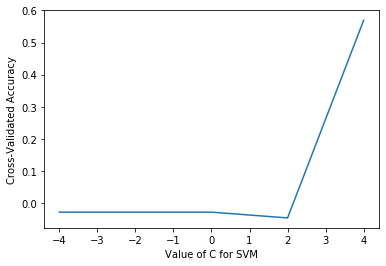

In [80]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [194]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=1,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.003038298521787053


# Model 5 : Decision Tree

In [195]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.24993704449905596


In [196]:
model.best_params_

{'max_depth': 5}

In [197]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.0627734932844549, 0.19835781061006127, 0.1921219556166082, 0.19074110158119506, 0.1924075850016293]


Text(0, 0.5, 'Cross-Validated Accuracy')

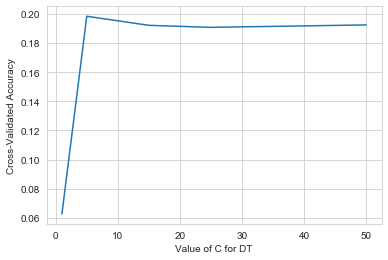

In [198]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [199]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=5,min_samples_split=2)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.20728023986414135


# Model 6 : Ensemble Techniques 

## A. Bagging

In [201]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9125296925278669


In [202]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=100,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.40717269863618943


# Boosting

In [203]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.4164892942486924


In [205]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=10,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.4212712810855095


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [206]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[01:46:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.27003174513724104


# 6.Model Comparison

In [2]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.3467' ])
table.add_row(["Linear Regression" ,'-0.0043' ])
table.add_row(["SVM", '0.0300' ])
table.add_row(["Decision Tree",'0.2072' ])
table.add_row(["RandomForest",'0.4071' ])
table.add_row(["GBDT" ,'0.4212' ])
table.add_row(["Xgboost",'0.2700' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.3467  |
| Linear Regression | -0.0043  |
|        SVM        |  0.0300  |
|   Decision Tree   |  0.2072  |
|    RandomForest   |  0.4071  |
|        GBDT       |  0.4212  |
|      Xgboost      |  0.2700  |
+-------------------+----------+


# 7.Creating Submission File

In [ ]:
best_model=GBDT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)